In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
airlines= pd.read_excel("D://assignments//Assignment 18//Airlines+Data.xlsx")
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [32]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%b-%y")
airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

In [33]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
p = airlines["month"][0]
p[0:3]

'Jan'

In [34]:
airlines['months']= 0

In [35]:
for i in range(96):
    p = airlines["month"][i]
    airlines['months'][i]= p[0:3]
    

<ipython-input-35-00524c1c41f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['months'][i]= p[0:3]
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [36]:
dummy=pd.DataFrame(pd.get_dummies(airlines['months']))

In [37]:
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
air=pd.concat((airlines,dummy),axis=1)
t= np.arange(1,97)
air['t']=t
air['t_square']=air['t']*air['t']

In [39]:
log_pass=np.log(air['Passengers'])
air['log_pass']=log_pass

In [40]:
air

,Month,Passengers,Date,month,year,months,Apr,Aug,Dec,Feb,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_pass
0,1995-01-01,112,1995-01-01,Jan,1995,Jan,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,Feb,0,0,0,1,...,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,Mar,0,0,0,0,...,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,Apr,1,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,May,0,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,Aug,0,1,0,0,...,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,Sep,0,0,0,0,...,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,Oct,0,0,0,0,...,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,Nov,0,0,0,0,...,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:>

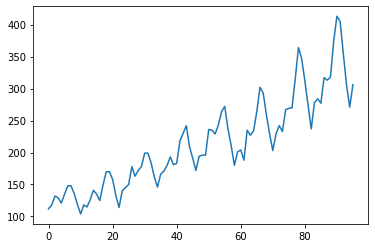

In [41]:
train= air.head(85)
test=air.tail(12)
air.Passengers.plot()

In [42]:
import statsmodels.formula.api as smf 

In [43]:
#linear model
linear= smf.ols('Passengers~t',data=train).fit()
pred_lin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_lin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(pred_lin))**2))
rmse_lin

28.26852648035964

In [44]:
#quadratic model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

48.61868346293974

In [45]:
#exponential model
expo=smf.ols('log_pass~t',data=train).fit()
pred_exp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmse_expo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_expo

46.199508966828255

In [46]:
#additive seasonality
additive= smf.ols('Passengers~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add=pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_add=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add))**2))
rmse_add

131.8486873070806

In [47]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.9758562790146

In [48]:
#additive seasonality with quadratic trend
addquad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

26.249333540082556

In [49]:
#multiplicative seasonality
mulsea=smf.ols('log_pass~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_mul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

139.2611440094573

In [50]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_pass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

10.426867009035979

In [51]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_pass~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

17.08975513158383

In [52]:
data={'Model':pd.Series(['rmse_mul_quad','rmse_add','rmseaddlinear','rmseaddquad','rmse_expo','rmse_lin','rmse_mul','rmsemulin','rmse_quad']),"RMSE_Values":pd.Series([rmse_mul_quad,rmse_add,rmseaddlinear,rmseaddquad,rmse_expo,rmse_lin,rmse_mul,rmsemulin,rmse_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
7,rmsemulin,10.426867
0,rmse_mul_quad,17.089755
3,rmseaddquad,26.249334
5,rmse_lin,28.268526
2,rmseaddlinear,34.975856
4,rmse_expo,46.199509
8,rmse_quad,48.618683
1,rmse_add,131.848687
6,rmse_mul,139.261144


In [53]:
final= smf.ols('log_pass~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air).fit()
pred= pd.Series(final.predict(air))
actual_pred = np.exp(pred)
actual_pred

0     107.728094
1     108.950966
2     125.818440
3     121.845099
4     121.145299
         ...    
91    390.738658
92    349.686530
93    306.789691
94    269.063940
95    308.195031
Length: 96, dtype: float64

In [28]:
!pip install  pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)


In [61]:
from pmdarima import auto_arima
arima_model = auto_arima(train["Passengers"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=539.689, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=541.417, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=541.547, Time=0.08 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=541.369, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=538.884, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=539.387, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,1)(2,1,0)[12]  

In [56]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 3)x(1, 1, [], 12)   Log Likelihood                -263.401
Date:                             Tue, 24 Aug 2021   AIC                            536.802
Time:                                     22:12:32   BIC                            548.185
Sample:                                          0   HQIC                           541.333
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2740      0.122     -2.239      0.025      -0.514      -0.034
ma.L2          0.0533      0.143      0.372      0.710      -0.227       0.334
ma.L3         -0.2611      0.144     -1.818      0.069      -0.543       0.020
ar.S.L12      -0.2358      0.120     -1.961      0.050      -0.471      -0.000
sigma2        86.9252     15.260      5.696      0.000      57.016     116.834
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.94   Prob(JB):                         0.48
Heteroskedasticity (H):               2.57   Skew:                             0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
arima_model.predict_in_sample( )

array([  0.        , 111.9984409 , 118.00047611, 131.99833363,
       129.00010005, 120.99985192, 134.99959041, 147.99999108,
       147.99981292, 136.00033901, 119.00021779, 104.0009414 ,
       174.00144247, 121.00369173, 138.67937849, 137.96024986,
       126.70672368, 138.7271343 , 159.84710982, 168.24501136,
       155.40088924, 137.74610268, 119.36320107, 128.65802375,
       135.12191024, 154.15230912, 163.60150053, 166.09993457,
       156.15851875, 185.39583981, 200.79461935, 194.96632594,
       187.72956988, 162.59167177, 142.85380267, 169.25027635,
       170.32605355, 176.23578934, 204.78741944, 183.37659767,
       184.56016176, 196.6228532 , 233.6800876 , 232.55417933,
       219.34256307, 190.59019062, 171.16346948, 195.90757508,
       199.46023647, 204.68484001, 215.23057201, 218.04258413,
       237.37791505, 254.93786523, 255.52013352, 272.39809008,
       246.92194539, 218.54033304, 194.34895696, 207.64857437,
       206.73340558, 210.26316353, 229.32307749, 229.37

In [58]:
pred_test = pd.Series(arima_model.predict(n_periods=12))